## <font color='Brown'>Image Classification Case Study using Convolutional Neural Networks</font>
***

#### Ivy


**About Convolutional Neural Networks**

deep learning CNN models to train and test, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1. The below figure is a complete flow of CNN to process an input image and classifies the objects based on values.

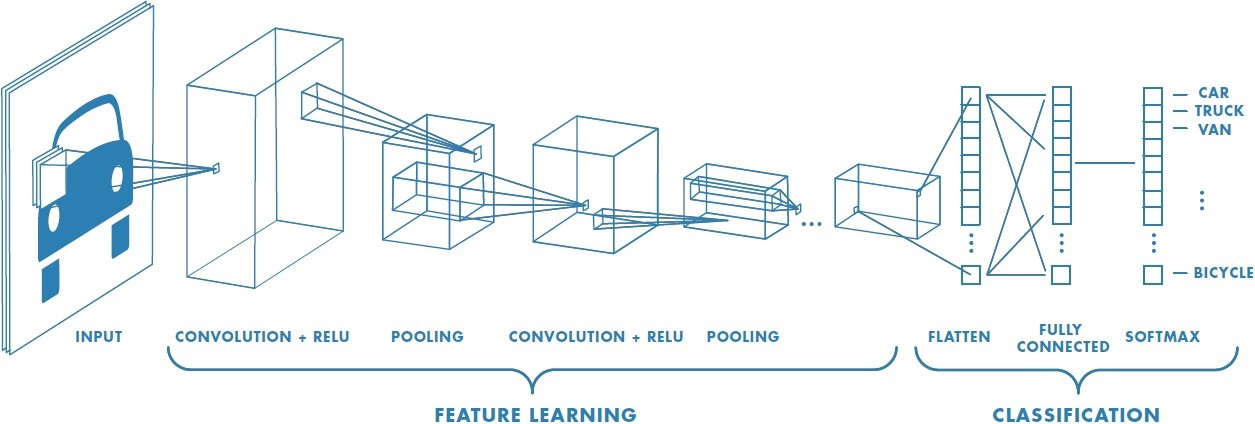

In [2]:
# importing tensorflow and keras

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical, plot_model

In [3]:
#Importing the dataset
fashion_mnist = keras.datasets.fashion_mnist
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()
print("Shape of x_train-->",xtrain.shape)
print("Shape of x_test-->",xtest.shape)

print("Shape of y_train-->",ytrain.shape)
print("Shape of y_test-->",ytest.shape)

Shape of x_train--> (60000, 28, 28)
Shape of x_test--> (10000, 28, 28)
Shape of y_train--> (60000,)
Shape of y_test--> (10000,)


In [45]:
# Defining array. Each item of array represent integer value of labels. 10 clothing item for 10 integer label.
class_names =['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Depedent Classes--->",class_names)

Depedent Classes---> ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [46]:
print("The no. of classess-->",len(class_names))

The no. of classess--> 10


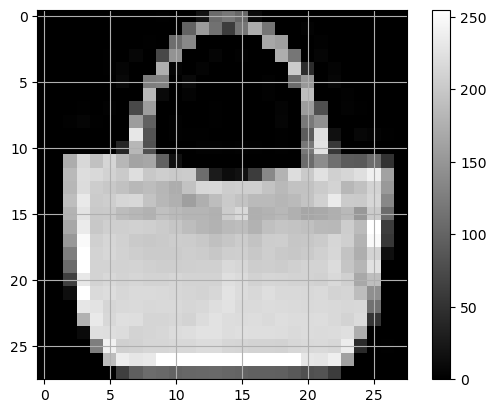

Class ID: 8 and Class name: Bag


In [47]:
# inspect the data in the array

index=100 # change this number 
plt.imshow(xtrain[index], cmap='gray') # printing 10th image
plt.colorbar() # shows the bar on the right side of the image
plt.grid(True) # will shot the grid
plt.show()
print("Class ID: %s and Class name: %s" % (ytrain[index], class_names[ytrain[index]]))

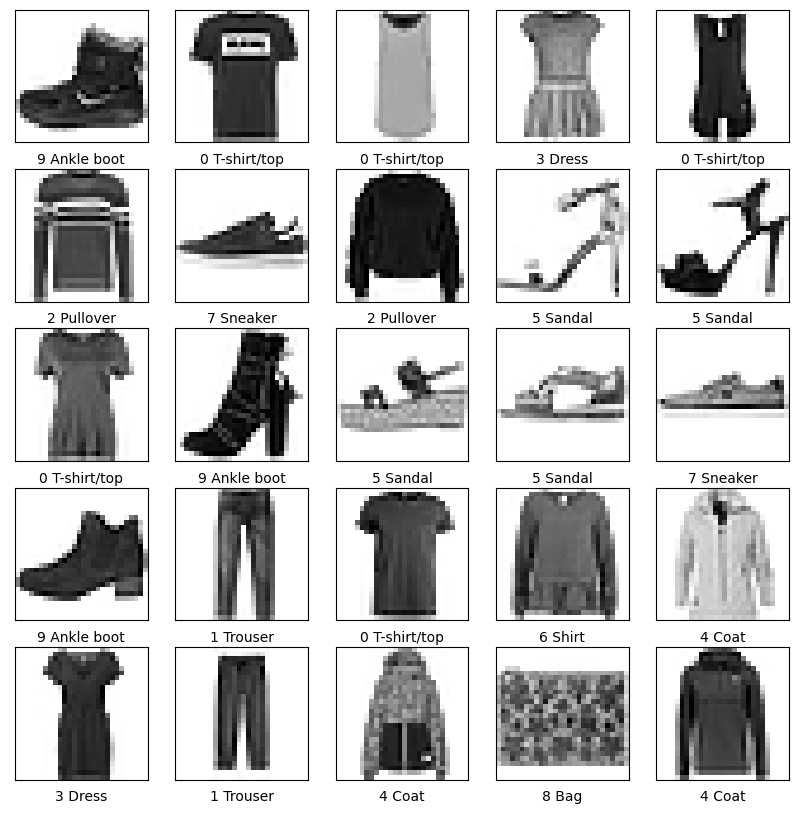

In [48]:
# display the first 25 images from traing set

plt.figure(figsize=(10,10))
for i in range(25): # 25 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xtrain[i], cmap=plt.cm.binary) # printing binary/black and white image
  plt.xlabel("%s %s" % (ytrain[i], class_names[ytrain[i]])) # Assigning name to each image
plt.show()

In [49]:
#Scaling the image values

xtrain = xtrain/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtrain.shape)

xtest = xtest/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtest.shape)

#becuse of pixel size varies from 0 to 256 then xtrain and xtest varies [0;1]


(60000, 28, 28)
(10000, 28, 28)


In [50]:
xtrain

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [51]:
ytrain # classes with respect to train data

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [52]:
ytest #classes with respect to test data

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [53]:
# One hot encoding of the labels.
#(generally we do one hot encoding of the features in EDA but in this case we are doing it for labels)

# Before one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest))

ytrain=to_categorical(ytrain)#one hot encoding features
ytest=to_categorical(ytest)#one hot encoding features

# After one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain[0]))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest[1]))

ytrain Shape: (60000,) and value: [9 0 0 ... 3 0 5]
ytest Shape: (10000,) and value: [9 2 1 ... 8 1 5]
ytrain Shape: (60000, 10) and value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
ytest Shape: (10000, 10) and value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


#### Building the CNN Architecture

In [54]:
# Modelling - Model on CNN

from tensorflow.keras import models, layers

#==================== Creation of empty Architecture ====================#
# create a sequential model i.e. empty neural network which has no layers in it.
model=models.Sequential() #empty network

#==================== Feature Detection / extraction Block ====================#
# Add first convolutional block - To deal with images we use Conv2D and for colour images and shape use Conv3D
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), input_shape=(28,28,1), activation='relu'))
# in the first block we need to mention input_shape
model.add(layers.Conv2D(6,(3,3),input_shape=(28,28,1),activation='relu')) #----> 1st Convolutional Layer
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2))) #----> 1st Max Pooling Layer

# Add Second convolutional block
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), activation='relu'))
model.add(layers.Conv2D(10,(3,3),activation='relu')) #----> 2nd Convolutional Layer
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))#----> 2nd Max Pooling Layer

#==================== Transition Block (from feature detection to classification) ====================#

# Add Flatten layer. Flatten simply converts matrics to array
model.add(layers.Flatten(input_shape=(28,28))) # this will flatten the image and after this Classification happens

#==================== Classification Block ====================#

# Classification segment - fully connected network
# The Dence layer does classification and is deep neural network. Dense layer always accept the array.
model.add(layers.Dense(128, activation='relu')) # as C5 layer in above image. 
# this 120 is hyper parameter whcih is number of neuron 
#model.add(layers.Dense(84, activation='relu'))# as F6 layer in aboave image

# Add the output layer
model.add(layers.Dense(10, activation='softmax')) # as Output layer in above image. The output layer normally have softmax activation
model

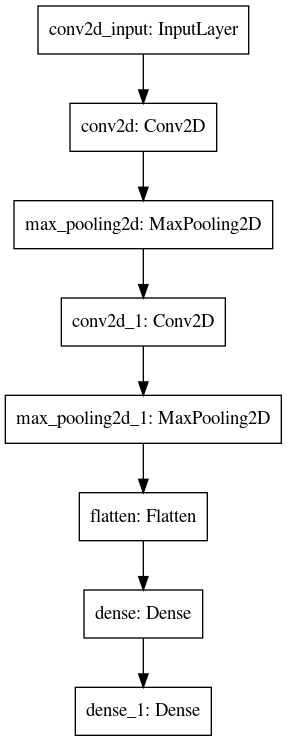

In [55]:
# Compile the model

# if we use softmax activation in output layer then best fit optimizer is categorical_crossentropy
# for sigmoid activation in output layer then loss will be binary_crossentropy

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
# if we do not go for One Hot Encoding then use loss='sparse_categorical_crossentropy'

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 10)        550       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 250)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

**Reading the summary:**

- There are 5 computational layers i.e. all the layers where param value is non-zero that is why it is called LeNet-5.
- Params are weights and bias
- the value 60 = 6 filters X kernal size 9 i.e.(3 X 3) = 54 + 6 bias (equal to number of filters) = 60
- the value 550 = 10 filters X kernal size 9 i.e.(3 X 3) = 90 X 6 filters of earliar layer = 540 + 10 bias (equal to number of filters) = 550
- In case of Dense layer 32128= 250 X 128 = 32000 + 128 bias
- In case of Dense layer 1290 = 120 X 10 = 1200 + 90 bias

In [56]:
# Train the model 
# Using GPU really speeds up this code
xtrain2=xtrain.reshape(60000,28,28,1)
xtest2=xtest.reshape(10000,28,28,1)

# print(xtrain.shape)
# print(xtest.shape)
# print(ytrain.shape)
# print(ytest.shape)

model.fit(xtrain2,ytrain,epochs=40,batch_size=1000,verbose=True,validation_data=(xtest2,ytest))

Epoch 1/40
60/60 [==============================] - 6s 89ms/step - loss: 1.4465 - accuracy: 0.5520 - val_loss: 0.7955 - val_accuracy: 0.7191
Epoch 2/40
60/60 [==============================] - 5s 86ms/step - loss: 0.6726 - accuracy: 0.7577 - val_loss: 0.6138 - val_accuracy: 0.7817
Epoch 3/40
60/60 [==============================] - 5s 87ms/step - loss: 0.5622 - accuracy: 0.7962 - val_loss: 0.5482 - val_accuracy: 0.8028
Epoch 4/40
60/60 [==============================] - 5s 90ms/step - loss: 0.5148 - accuracy: 0.8139 - val_loss: 0.5189 - val_accuracy: 0.8137
Epoch 5/40
60/60 [==============================] - 5s 88ms/step - loss: 0.4842 - accuracy: 0.8254 - val_loss: 0.4876 - val_accuracy: 0.8287
Epoch 6/40
60/60 [==============================] - 5s 87ms/step - loss: 0.4625 - accuracy: 0.8344 - val_loss: 0.4738 - val_accuracy: 0.8316
Epoch 7/40
60/60 [==============================] - 5s 89ms/step - loss: 0.4465 - accuracy: 0.8406 - val_loss: 0.4596 - val_accuracy: 0.8395
Epoch 8/40
60

In [57]:
# evaluate accuracy of the model
test_loss, test_acc = model.evaluate(xtest2, ytest)
print("test accuracy:", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3357 - accuracy: 0.8781
test accuracy: 0.8780999779701233


In [58]:
# predicting lable for test_images

predictions=model.predict(xtest2)

# Prediction of the 1st result. It will show the 10 predictions of labels for test image
print("1. Prediction array: %s" % (predictions[0]))

# we will verify that which result for label has highest confidence
print("2. Label number having highest confidence in prediction array: %s" % (np.argmax(predictions[0])))

# let us verify what is the label in test_labels.
print("3. Actual label in dataset: %s" % (ytest[0]))

313/313 [==============================] - 1s 4ms/step
1. Prediction array: [5.1875536e-06 2.7490549e-10 5.3908667e-07 3.8249033e-07 1.4525507e-07
 4.4865198e-03 1.8406607e-06 2.6941825e-02 4.4512106e-04 9.6811843e-01]
2. Label number having highest confidence in prediction array: 9
3. Actual label in dataset: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [59]:
# creating a funtion which will help to verify the prediction is true of not
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
  
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary) # showing b/w image

    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    # print(predicted_label)
    # print(true_label)

    if predicted_label == true_label: #setting up label color
        color='blue' # correct then blue colour

    else:
        color='red' # wrong then red colour

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),color=color)
  



In [60]:
##function to display bar chart showing whether image prediction is how much correct  

def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10), predictions_array, color='gray')
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

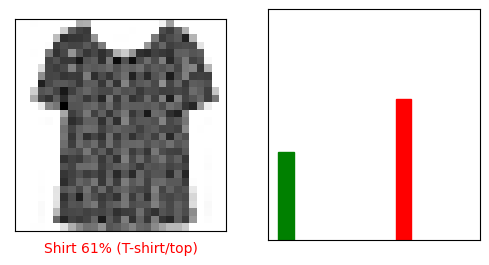

In [61]:
# call the function

# defining parameters to pass to function
i=1000 # image number 56. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

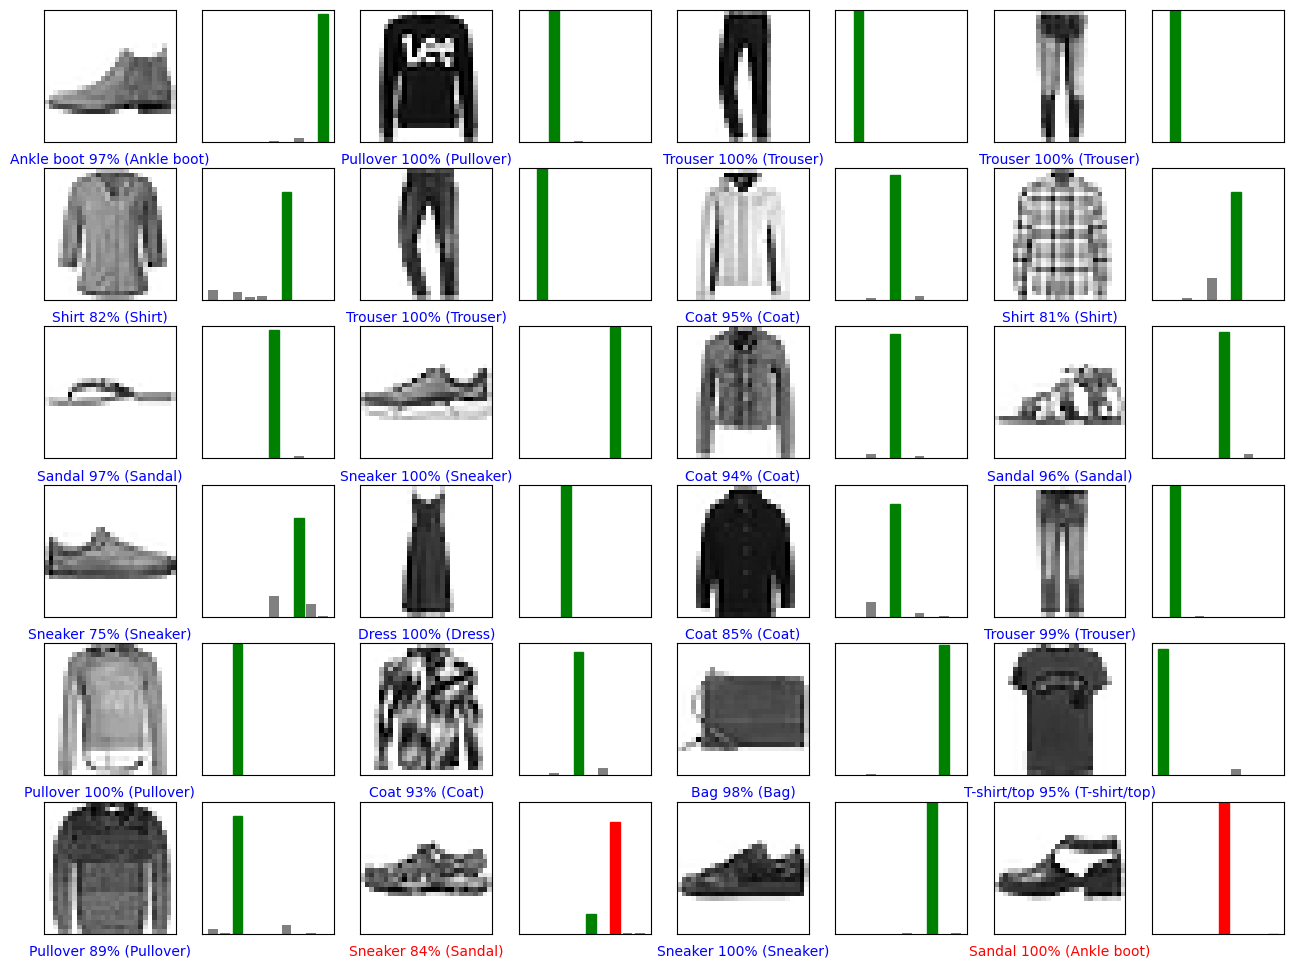

In [62]:
# verification of several images

num_rows=6
num_cols=4
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i,predictions, ytest, xtest)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions, ytest)
plt.show()

With a complex sequential model with multiple convolution layers and 20 epochs for the training, we obtained an accuracy ~0.91 for test prediction.